In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

The dataset presents the information of bank customers.<br/>
The output is to build a classifier which can determine whether they will leave or not?<br/>
First of all, let's take some look inside the dataset to gain the some first insights.

<h4> **Data preprocessing**</h4>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('../input/Churn_Modelling.csv')
dataset.describe()
dataset.head(10)

As can we seen, the dataset shows some bank customer's information such as **CreditScore**, **Geography**,** Balance**, *and so on*.
We could use all of the information to create a classifier to predict the exiting of customers in next period. However,from my respective, with more input information, we can get better insights, but it does not mean we can have the better results. Sometimes, with so many inputs, some key factors will be faded, and noise could be created.

In my opinion, one of the main key features is the **Age**. Normally, when people get older, they will turn into stability, and do not prefer to change much. As the youths,there are many interesting programs from the banks to actract the new generation clients. The second factor is the **CreditScore**. Credit Score could tell a lot about the customers. With higher score, the customers will get more benefits from the banks, and also the banks want to keep them, then the possibility they will stay long with bank is higher. 

Besides, there could be 2 kinds of customer who will stay long at the bank. The first one is those who have high **EstimatedSalary**. For this group, 
those clients are usually seeking for the bank to trust to put those money. As long as no problems occurs, they could stay faithfully long there. For this model,I will choose **CreditScore**, **Age**, **EstimatedSalary**, and **IsActiveMember** to build the classifier

The second group of customers, are those who are lazy to change or close the bank accounts. They have very high possibility of being inactive,
since they dont care much about the bank credit. they are also could low balance. Therefore, the third model I want to build will include 
**CreditScore**, **Age**, **Balance**, and **IsActiveMember**.

Other factors I did not mention has reasons. Firsly, most of the countries we can see is europian countries, therefore there would be not significantly different here. Second, gender nowadays does not play much important role in comparation between male and female. Tenure, Number of products, and credit card, are not important in my classifiers, thus both of them could have a long time in the bank, have few banks accounts and credits or using cash only.

**Now, Let's go to verify the prediction!!!**

In [ ]:
#The first model, which include all the features
X1 = dataset.iloc[:,3:13].values
y  = dataset.iloc[:,13].values
#The subdataset for the second classifier, which has high salaries
X2 = dataset[['CreditScore','Age','EstimatedSalary','IsActiveMember']].values
#The third subdataset for the third classifier, which are lazy to change or close the bank accounts
X3 = dataset[['CreditScore','Age','Balance','IsActiveMember']].values

In [ ]:
# Encoding categorical data,
# Here only Country and Gender feature need to be encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X1[:, 1] = labelencoder_X_1.fit_transform(X1[:, 1])
labelencoder_X_2 = LabelEncoder()
X1[:, 2] = labelencoder_X_2.fit_transform(X1[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X1 = onehotencoder.fit_transform(X1).toarray()
X1 = X1[:, 1:] #Avoid dummy variable traps

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)
X2_train, X2_test = train_test_split(X2, test_size = 0.2, random_state = 0)
X3_train, X3_test = train_test_split(X3, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
# As we can see from the data, there are difference in scale of data in each catagory in the set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

<h5> **Build ANN** </h5>
Now, we have finished preprocessed our data. We are going to build our classifiers! <br/>
As we know that, for each model, different datasets, there will be various parameters would fit, and give the best results. it would not be wise to apply once method to all. <br/>
Therefore, to help us verify this idea, I will use GridSearchCV to test some parameters, such as batch-size, epoch, and optimizer method.<br/>
**However**, due to the limit time running in the Kaggle, I was not able to test GridSearchCV here, I will provide my own result running on my laptop below.
<br/>Thus, I will used **K_fold Cross Validation** instead, to see the accuracies between our models.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

Here I would build 2 types of classifier for our 3 models. The first classifier is for our first model, where we are going to take accounts in all features. While the second one we only care about 4 input factors. The number of hidden units I usually choose is **half** of the input variables.

In [ ]:
#Our first classifier
def build_classifier1():
    classifier1 = Sequential()
    classifier1.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier1.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier1

In the function above, I have created 2 hidden layers with 6 nodes, and the activation function I used is rectified linear unit (**relu**). However, for the output layer, since the result we expect is that the clients will stay or not, thus **sigmoid** is the better choice.<br/>
On the other hand, for the compile method, since we used **sigmoid** as the output activation, the loss method which will fit to this choice would be **binary_crossentropy**.<br/>
Similarily, we create the second classifier for our 2 models.

In [ ]:
def build_classifier2():
    classifier2 = Sequential()
    classifier2.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
    classifier2.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))
    classifier2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier2

**Things done!** Now we are going to test our classifiers for our models. **Let's go!!**

In [ ]:
#Now we going to see the results of the first model!
classifier1 = KerasClassifier(build_fn = build_classifier1, batch_size = 10, epochs = 100)
accuracies1 = cross_val_score(estimator = classifier1, X = X1_train, y = y_train, cv = 10, n_jobs = -1)
mean1 = accuracies1.mean()
variance1 = accuracies1.std()

In [ ]:
#Next we going to see the results of the second model!
classifier2 = KerasClassifier(build_fn = build_classifier2, batch_size = 10, epochs = 100)
accuracies2 = cross_val_score(estimator = classifier2, X = X2_train, y = y_train, cv = 10, n_jobs = -1)
mean2 = accuracies2.mean()
variance2 = accuracies2.std()


In [ ]:
#Last we going to test the results of the third model!
classifier3 = KerasClassifier(build_fn = build_classifier2, batch_size = 10, epochs = 100)
accuracies3 = cross_val_score(estimator = classifier2, X = X3_train, y = y_train, cv = 10, n_jobs = -1)
mean3 = accuracies3.mean()
variance3 = accuracies3.std()

**Here is the most waiting part of all!  Let's see the accuracies...**

In [ ]:
print('The accuracy of our first model is:  ',mean1)
print('The vairance of accuracy is:         ',variance1)
print('The accuracy of our second model is: ',mean2)
print('The vairance of accuracy is:         ',variance2)
print('The accuracy of our third model is:  ',mean3)
print('The vairance of accuracy is:         ',variance3)

We can improve the model by testing other **batch-size**, **epoch**, or **optimizer** by using **GridSearchCV**, but it is going to be quite suffuring since the time running could be hours!<br/>

'''<br/>
parameters = {'batch_size': [10, 20],
              'epochs': [100, 200],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)<br/>
grid_search2 = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

#Now we going to seethe results of the first model!
grid_search1 = grid_search.fit(X1_train, y_train)<br/>
best_parameters1 = grid_search1.best_params_<br/>
best_accuracy1 = grid_search1.best_score_<br/>
#Now we going to seethe results of the sencond model!<br/>
grid_search2 = grid_search2.fit(X2_train, y_train)<br/>
best_parameters2 = grid_search2.best_params_<br/>
best_accuracy2 = grid_search2.best_score_<br/>
#Now we going to seethe results of the last model!<br/>
grid_search3 = grid_search2.fit(X3_train, y_train)<br/>
best_parameters3 = grid_search2.best_params_<br/>
best_accuracy3 = grid_search2.best_score_<br/>
'''

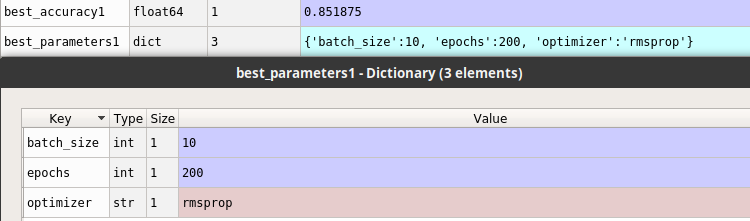

As can we see from a result, for the first model, we can improve the accuracy up to 85.18% by using **epoch** = 200, and the **optimizer** for compiling is **rmsprop**.

**Conclusion:**<br/>
As we can see from the results,  The first model, which involve all of the features has won the battle! They have the highest accuracy compared to two others. However, the difference between accuracies between them is not so significant, from 3 to 5%. On the other, the variance of these models are also similar, but it is not a big duel.<br/>






**To sum up:** <br/>
I am quite satified with the results. First, I could successful build the classifier to tell whether the clients still stay or not. Second,
I tested my predicts, that I just focused on some main keys to build the model.
However, in the code, there are some places such as writing the function classifier, I was not able to optimize and simplify it better.
